<a href="https://colab.research.google.com/github/Maternowsky/Maternowsky/blob/main/Partitioning_Dataset%2C_Feature_Selection%2C_Dimentionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading Wine Dataset**

In [2]:
import pandas as pd
import numpy as np
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)
df_wine.columns=['Class label', 'Alcohol', 'Malic acid', 'Ash',
                 'Alcalinity of ash', 'Magnesium', 'Total phenols', 
                 'Flavenoids', 'Nonfalvanoid phenols', 'Proanthocyanins',
                 'Color intensity', 'Hue', '0D280/0D315 of diluted wines',
                 'Proline']
print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavenoids,Nonfalvanoid phenols,Proanthocyanins,Color intensity,Hue,0D280/0D315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# **Split into Training and Test**

In [3]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test =   train_test_split(X,y, 
                                                      test_size = 0.3,
                                                      random_state = 0,
                                                      stratify=y)
#stratify = y ensures both training and test datasets have same class
# proportions as the original dataset

# **Feature Scaling**

## Decision trees and random forests are of the few algorithms where we dont need to worry about feature scaling

## **Two common approaches. Normalization, Standardization**

### **min-max scaling (features to range of [0,1])**

In [4]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

## **Standardization and Normalization manually**

In [5]:
ex = np.array([0,1,2,3,4,5])
print('standardized: ', (ex - ex.mean()) / ex.std())

standardized:  [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]


In [6]:
print('normalized: ', (ex - ex.min())/ (ex.max() - ex.min()))

normalized:  [0.  0.2 0.4 0.6 0.8 1. ]


## **scikit learn StandardScaler**

### **Only use once on the training data. use paramaters to transform test data or new data**

In [7]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

### other methods for feature scaling from scikit-learn are RobustScaler(good for data prone to overfitting)

## **Meaningful features - if model performs better on training than test dataset, good indicator of overfitting(high-variance)**

### **L2 regularization - penalizing large individual weights to reduce complexity (circle shape)**

### **L1 regularization - replace square of weights with sum of absolute values of weights, yeilds space feature vectors, most feature weights will be zero, good if many features are irrelevant (diamond shape)**

In [8]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty = 'l1',
                   solver = 'liblinear',
                   multi_class = 'ovr')

#in scikit-learn set penalty to 'l1' to obtain sparse solution
#need different optimization algorithm since 'lbfgs' doesn't support l1

LogisticRegression(multi_class='ovr', penalty='l1', solver='liblinear')

In [9]:
lr = LogisticRegression(penalty= 'l1', C=1.0,
                         solver = 'liblinear',
                         multi_class = 'ovr')
# C = 1.0 is default, can increase or decrease to adjust regularization
lr.fit(X_train_std, y_train)
print('Training accuracy: ',
      lr.score(X_train_std, y_train))
print('Test accuracy: ',
      lr.score(X_test_std, y_test))

Training accuracy:  1.0
Test accuracy:  1.0


In [10]:
lr.intercept_
#where slope crosses y?

array([-1.26347562, -1.21580705, -2.37023858])

In [11]:
lr.coef_

array([[ 1.24597765,  0.18076398,  0.74359891, -1.16140533,  0.        ,
         0.        ,  1.17018492,  0.        ,  0.        ,  0.        ,
         0.        ,  0.54691155,  2.51036873],
       [-1.53787469, -0.38664816, -0.99545903,  0.36455847, -0.0592314 ,
         0.        ,  0.66764892,  0.        ,  0.        , -1.93325176,
         1.23529466,  0.        , -2.232299  ],
       [ 0.13564196,  0.16854806,  0.3570892 ,  0.        ,  0.        ,
         0.        , -2.43816252,  0.        ,  0.        ,  1.56371346,
        -0.81872934, -0.49248809,  0.        ]])

### [above] shows weight array, one wieght vector for each class of model consisting of 13 weights


### [above] used l1  regularization above to create sparsity, but have more numbers than zeros. to create more spasity increase the C paramater and will get more zeros.

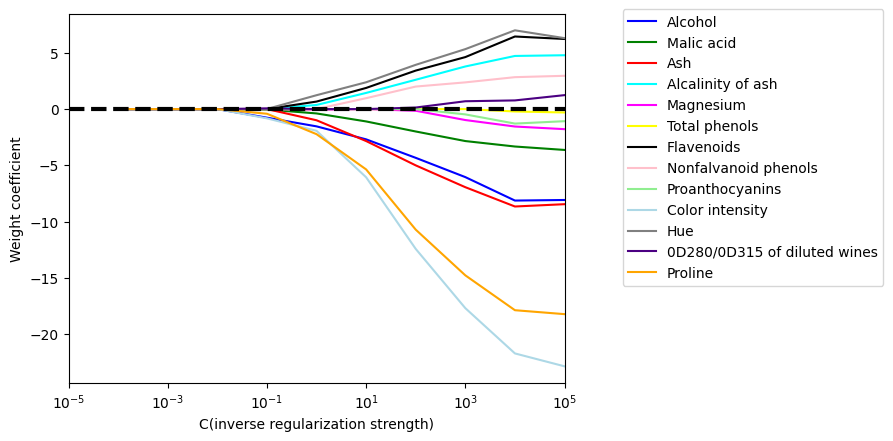

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow',
          'black','pink','lightgreen','lightblue','gray','indigo',
          'orange']
weights, params = [] , []
for c in np.arange(-4., 6.):
  lr = LogisticRegression(penalty = 'l1', C=10**c, solver = 'liblinear',
                          multi_class = 'ovr', random_state = 0)
  lr.fit(X_train_std, y_train)
  weights.append(lr.coef_[1])
  params.append(10**c)
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
  plt.plot(params, weights[:,column],
           label = df_wine.columns[column + 1], color = color)
plt.axhline(0, color = 'black', linestyle = '--', linewidth = 3)
plt.xlim([10**(-5), 10**(5)])
plt.ylabel('Weight coefficient')
plt.xlabel('C(inverse regularization strength)')
plt.xscale('log')
plt.legend(loc = 'upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38,1.03), ncol=1,
          fancybox = True)
plt.show()

# **Diminsionality Reduction**

## **Feature Selections, Feature Extraction**

## **(SBS) Sequential Backward Selection, Feature Selection**

In [13]:
from sys import set_coroutine_origin_tracking_depth
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
class SBS:
  def __init__(self, estimator, k_features, scoring = accuracy_score,
                test_size = 0.25, random_state = 1):
    self.scoring = scoring
    self.estimator = clone(estimator)
    self.k_features = k_features
    self.test_size = test_size
    self.random_state = random_state
  
  def fit(self, X, y):
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=self.test_size,
                          random_state = self.random_state)
    dim = X_train.shape[1]
    self.indices_ = tuple(range(dim))
    self.subsets_ = [self.indices_]
    score = self._calc_score(X_train, y_train, X_test, y_test,
                             self.indices_)
    self.scores_ = [score]
    while dim > self.k_features:
      scores = []
      subsets = []
      for p in combinations(self.indices_, r = dim - 1):
        score = self._calc_score(X_train,y_train,X_test,y_test,p)
        scores.append(score)
        subsets.append(p)
      best = np.argmax(scores)
      self.indices_=subsets[best]
      self.subsets_.append(self.indices_)
      dim -= 1
      self.scores_.append(scores[best])
    self.k_score_ = self.scores_[-1]
    return self
  def transform(self, X):
    return X[:, self.indices_]
  def _calc_score(self, X_train, y_train,X_test,y_test,indices):
    self.estimator.fit(X_train[:, indices], y_train)
    y_pred = self.estimator.predict(X_test[:,indices])
    score = self.scoring(y_test, y_pred)
    return score
  

    

### **SBS using KNN classifier**

In [14]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features = 1)
sbs.fit(X_train_std, y_train)

### **Plot KNN with SBS**

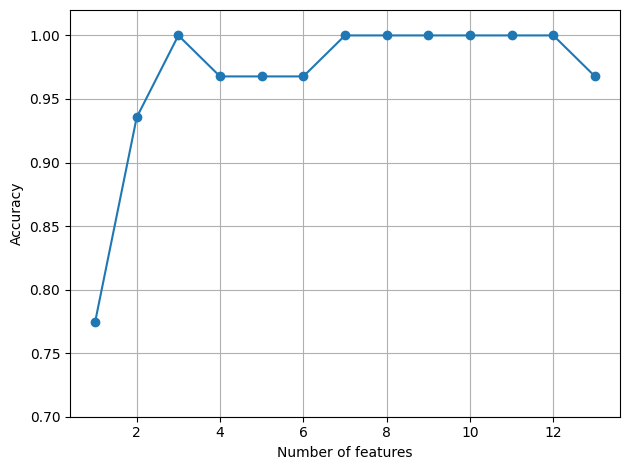

In [15]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker= 'o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

### **[above] KNN classifier improved as number of features is reduced, likely due to curse of dimensionality. 100% accuracy for k={3,7,8,9,10,11,12}**

### **Checking k=3 smallest feature subset looks like**

In [16]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])


Index(['Alcohol', 'Malic acid', '0D280/0D315 of diluted wines'], dtype='object')


### **using KNN on original test dataset**

In [17]:
knn.fit(X_train_std,y_train)
print('Training accuracy: ',
      knn.score(X_train_std, y_train))
print('Test accuracy: ', knn.score(X_test_std, y_test))

Training accuracy:  0.967741935483871
Test accuracy:  0.9629629629629629


### **Testing KNN with 3 feature**

In [18]:
knn.fit(X_train_std[:,k3],y_train)
print('Training accuracy: ',
      knn.score(X_train_std[:, k3], y_train))
print('Test accuracy: ', 
      knn.score(X_test_std[:, k3], y_test))

Training accuracy:  0.9516129032258065
Test accuracy:  0.9259259259259259


### We didnt improve accuracy of model with reduced features but could be useful in computationally expensive applications in real world

# **Feature Importance with Random Forests**

 1) Proline                        0.185453
 2) Flavenoids                     0.174751
 3) Color intensity                0.143920
 4) 0D280/0D315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonfalvanoid phenols           0.013354
13) Ash                            0.013279


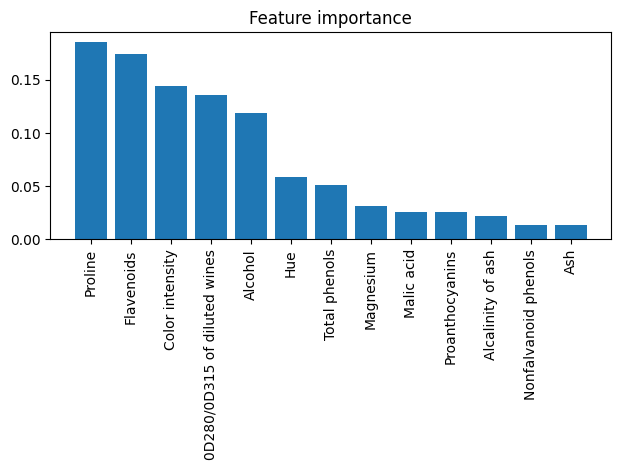

In [22]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators = 500, random_state = 1)
forest.fit(X_train,y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
  print("%2d) %-*s %f" %(f + 1, 30, feat_labels[indices[f]],
                         importances[indices[f]]))
plt.title('Feature importance')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align = 'center')
plt.xticks(range(X_train.shape[1]),
           feat_labels[indices], rotation = 90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

## **[above] two of top rated features were present in 3 feature knn. One GOTCHA worth mentioning is if two or more features are highly correlated one feature may be ranked high while the other feature might not be fully captured**

### **Scikit - learn also implements a SelectFromModel object that selects features based on user specified threshold after model fitting, useful if use RandomForest Classifier as feature selector in Pipeline object. we could set threshold to 0.1 to reduce dataset to 5 most important features**

In [23]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest, threshold = 0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold',
      'criterion:', X_selected.shape[1])
for f in range(X_selected.shape[1]):
  print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]],
                          importances[indices[f]]))

Number of features that meet this threshold criterion: 5
 1) Proline                        0.185453
 2) Flavenoids                     0.174751
 3) Color intensity                0.143920
 4) 0D280/0D315 of diluted wines   0.136162
 5) Alcohol                        0.118529
